------------------------------ 
# <center> <img alt="Colaboratory logo" width="15%" src="https://www.mackenzie.br/fileadmin/_processed_/4/2/csm_instituto-logo_4594b3b3ab.jpg"> </center>



# <center> Data Science Experience </center>
 ------------------------------ 

# <center> TechCorpBrasil - Análise Exploratória </center>

**📋Curso:** MBA em Engenharia de Dados  | **Turma:** 2025G


**📋Grupo:**
 
- Brunno Souza de Mambro Santos  (10740187) 
- Fábio Fumio Wada  (10741479) 
- Sweeli Suzuki (10423319) 
- Tatiane Silva Santos  (10747108)

#
#

------------------------------ 

## <center> 📋 Documentação </center>

### 🔍 Python - Bibliotecas



| **Nome da Biblioteca** | **Instalação Google Colab** | **Instalação Python** |
|-----------|----------|---------------|
| **Pandas** | !pip install pandas | pip install pandas |
| **Numpy** | !pip install numpy | pip install numpy |
| **Openpyx** | !pip install pandas openpyxl | pip install pandas openpyxl |
| **Matpotlib** | !pip install matplotlib | pip install matplotlib |
| **Seaborn** | !pip install seaborn | pip install seaborn |
| **Sklearn** | !pip install scikit-learn | pip install scikit-learn |
| **XGBoost** | !pip install xgboost | pip install xgboost |
| **Imblearn** | !pip install imblearn | pip install imblearn |
| **Shap** | !pip install shap | pip install shap |


### 🔍 Descrição Detalhada das Variáveis


### 1. Variáveis Demográficas

| **Campo** | **Tipo** | **Descrição** | **Valores** | **Observações** |
|-----------|----------|---------------|-------------|-----------------|
| **Age** | Integer | Idade do funcionário | 18-65 |  |
| **Gender** | String | Gênero do funcionário | 'Male', 'Female' |  |
| **MaritalStatus** | String | Estado civil | 'Single', 'Married', 'Divorced' | **Importante para análise de attrition** |
| **Education** | String | Nível de educação | 'Bellow’ College', 'College', 'Bachelor','Master','Doctor' |
| **EducationField** | String | Área de formação | ‘Information Tecnnology’, ‘Engineering’, ‘Marketing’, ‘Computer Science’, ‘Human Resources’, ‘Other’ | |


### 2. Variáveis Profissionais

| **Campo** | **Tipo** | **Descrição** | **Valores** | **Observações** |
|-----------|----------|---------------|-------------|-----------------|
| **Department** | String | Departamento atual | 'Sales', 'Research & Development', 'Human Resources' | **R&D tem maior população |
| **JobRole** | String | Função/Cargo atual | 9 diferentes roles | Sales Executive', 'Software Developer', 'Project Manager', 'Financial Analyst', 'Director', 'Manager','Consultant', 'Analyst', 'Human Resources' |
| **JobLevel** | Integer | Nível hierárquico | 1-5 | 1=Entry, 5=Senior |
| **JobInvolvement** | Integer | Nível de envolvimento no trabalho | 1-4 | 1='Low', 2='Medium', 3='High', 4='Very High' |
| **YearsAtCompany** | Integer | Anos na empresa atual | 0-40 |  |


### 3. Variáveis de Compensação

| **Campo** | **Tipo** | **Descrição** | **Valores** | **Observações** |
|-----------|----------|---------------|-------------|-----------------|
| **MonthlyIncome** | Integer | Salário mensal | 1009-19999 |  |
| **PercentSalaryHike** | Integer | % do último aumento | 11-25 | |
| **StockOptionLevel** | Integer | Nível de stock options | 0-3 | 0=Sem opções, 3=Mais opções |

### 4. Variáveis de Satisfação

| **Campo** | **Tipo** | **Descrição** | **Valores** | **Observações** |
|-----------|----------|---------------|-------------|-----------------|
| **JobSatisfaction** | Integer | Satisfação com trabalho | 1-4 | 1='Low', 2='Medium', 3='High', 4='Very High' |
| **EnvironmentSatisfaction** | Integer | Satisfação com ambiente | 1-4 | 1='Low', 2='Medium', 3='High', 4='Very High' |
| **RelationshipSatisfaction** | Integer | Satisfação com relacionamentos | 1-4 | 1='Low', 2='Medium', 3='High', 4='Very High' |


### 5. Variáveis de Trabalho Atual (Work Life)

| **Campo** | **Tipo** | **Descrição** | **Valores** | **Observações** |
|-----------|----------|---------------|-------------|-----------------|
| **OverTime** | String | Realiza Horas Extras | 'Yes', 'No' | |
| **WorkLifeBalance** | Integer | Equilíbrio trabalho-vida | 1-4 | 1='Bad', 2='Good', 3='Better', 4='Best' |
| **BusinessTravel** | String | Frequência de viagens | 'Non-Travel', 'Travel_Rarely', 'Travel_Frequently' | **Forte correlação com attrition |
| **DistanceFromHome** | Integer | Distância casa-trabalho (km) | 1-29 |** Impacta satisfação e attrition |

### 6. Variáveis de Performance

| **Campo** | **Tipo** | **Descrição** | **Valores** | **Observações** |
|-----------|----------|---------------|-------------|-----------------|
| **PerformanceRating** | Integer | Avaliação de performance | 3-4 | 3='Excellent', 4='Outstanding' |
| **TrainingTimesLastYear** | Integer | Treinamentos no último ano | 0-6 |  |

### 7. Variáveis de Target

| **Campo** | **Tipo** | **Descrição** | **Valores** | **Observações** |
|-----------|----------|---------------|-------------|-----------------|
| **Attrition** | String | Funcionário deixou a empresa | 'Yes', 'No' | **Target - ~16% 'Yes' |

In [37]:
# -*- coding: utf-8 -*-

# ==============================================================================
# 0. CONFIGURAÇÃO DO AMBIENTE E IMPORTAÇÃO DE BIBLIOTECAS
# ==============================================================================

print('# ==============================================================================')
print('# 0. CONFIGURAÇÃO DO AMBIENTE E IMPORTAÇÃO DE BIBLIOTECAS')
print('# ==============================================================================')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                             average_precision_score, f1_score, make_scorer,
                             matthews_corrcoef, balanced_accuracy_score)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import shap
import os

# Configurações de visualização e avisos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
warnings.filterwarnings('ignore')

# Configuração do local de gravação de resultados/gráficos
# Cria pasta 'resultados' para salvar os gráficos e dados da análise
v_local_gravacao_dataset = '_dataset'
if not os.path.exists(v_local_gravacao_dataset):
  os.makedirs(v_local_gravacao_dataset)
  print(f"Diretório '{v_local_gravacao_dataset}' criado.")

v_local_gravacao_analise = '_analise_preliminar'
if not os.path.exists(v_local_gravacao_analise):
  os.makedirs(v_local_gravacao_analise)
  print(f"Diretório '{v_local_gravacao_analise}' criado.")

v_local_gravacao_treinamento = '_treinamento'
if not os.path.exists(v_local_gravacao_treinamento):
  os.makedirs(v_local_gravacao_treinamento)
  print(f"Diretório '{v_local_gravacao_treinamento}' criado.")

v_local_gravacao_modelo = '_modelo_treinado'
if not os.path.exists(v_local_gravacao_modelo):
  os.makedirs(v_local_gravacao_modelo)
  print(f"Diretório '{v_local_gravacao_modelo}' criado.")  

# ==============================================================================
# 0. CONFIGURAÇÃO DO AMBIENTE E IMPORTAÇÃO DE BIBLIOTECAS
# ==============================================================================
Diretório '_modelo_treinado' criado.


# ==============================================================================
# 1. CARREGAMENTO E ANÁLISE EXPLORATÓRIA DE DADOS
#===============================================================================
dataset carregado com sucesso.

--- Informações básicas do dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   Age                       1000000 non-null  int32 
 1   Attrition                 1000000 non-null  object
 2   BusinessTravel            1000000 non-null  object
 3   Department                1000000 non-null  object
 4   DistanceFromHome          1000000 non-null  int32 
 5   Education                 1000000 non-null  int32 
 6   EducationField            1000000 non-null  object
 7   EnvironmentSatisfaction   1000000 non-null  int32 
 8   Gender                    1000000 non-nu

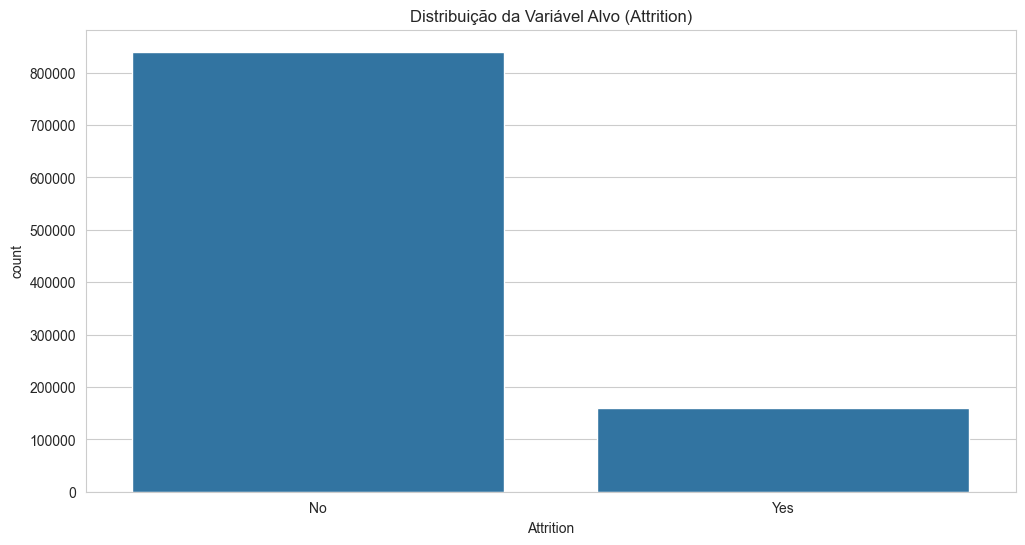

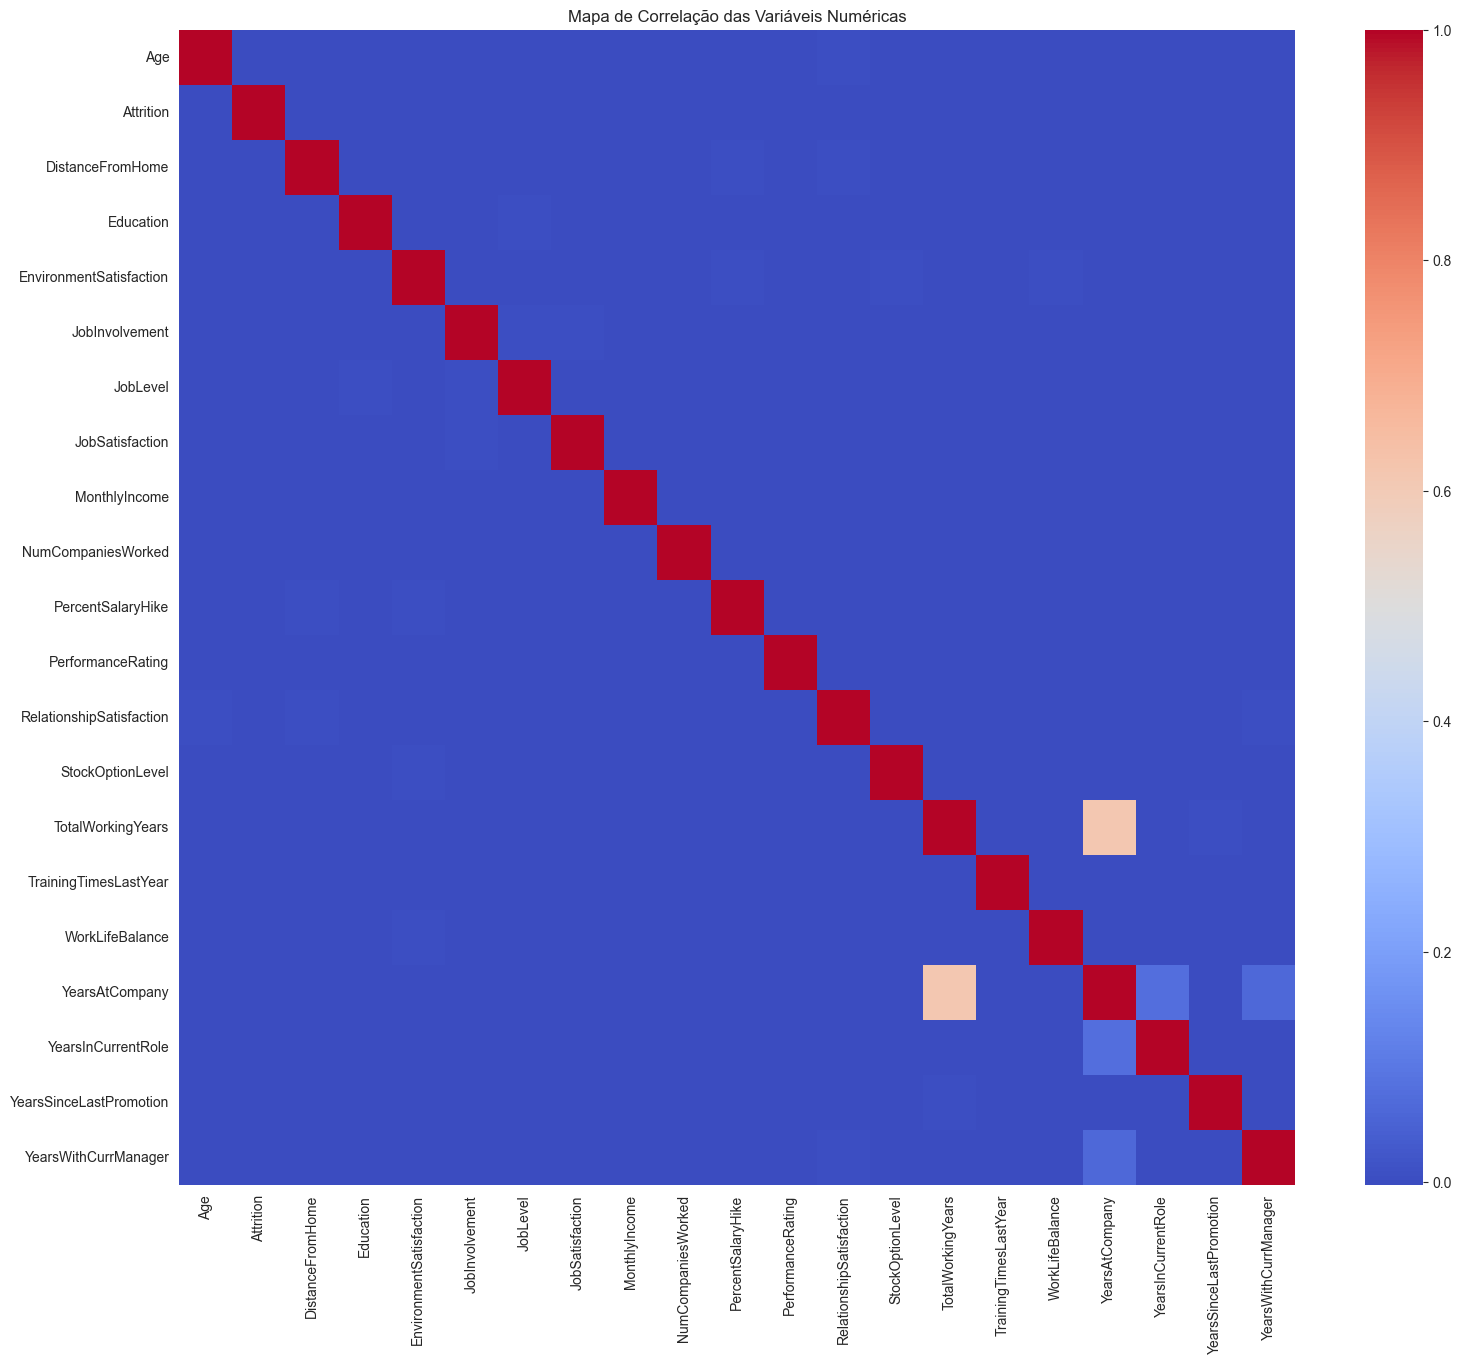

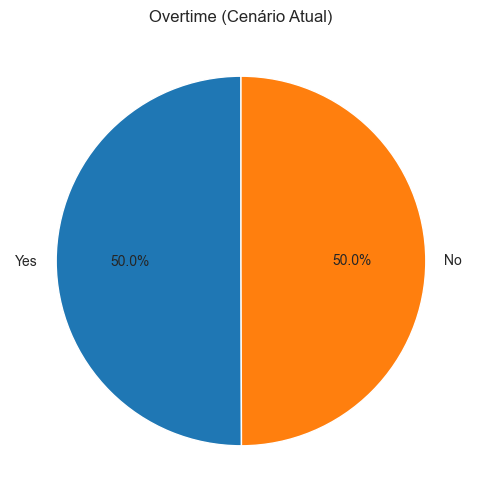

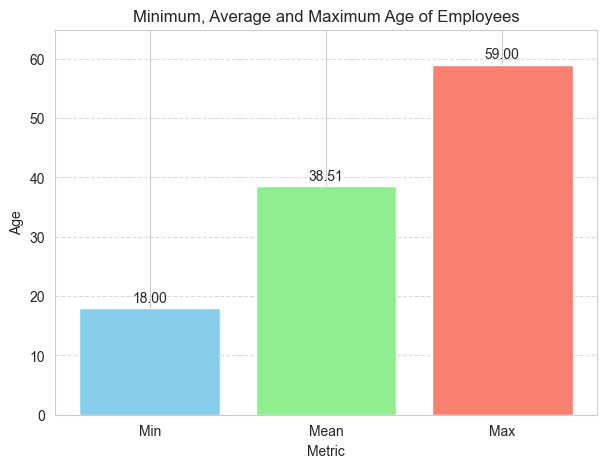

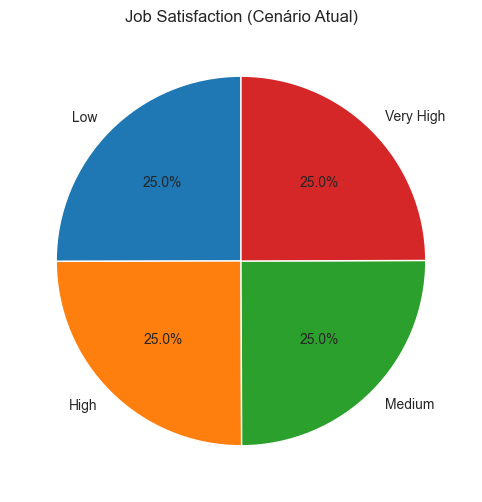

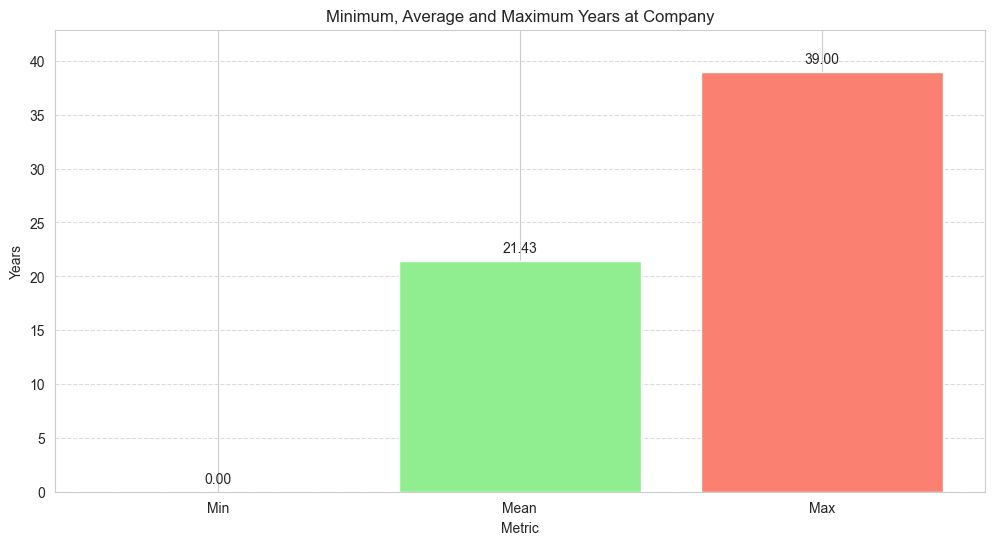

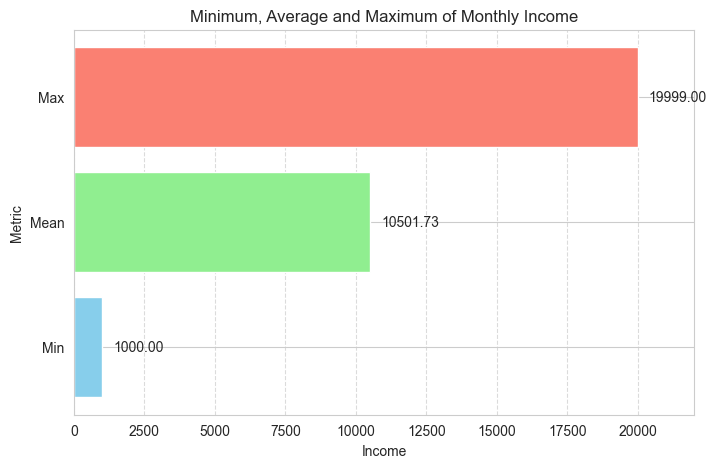

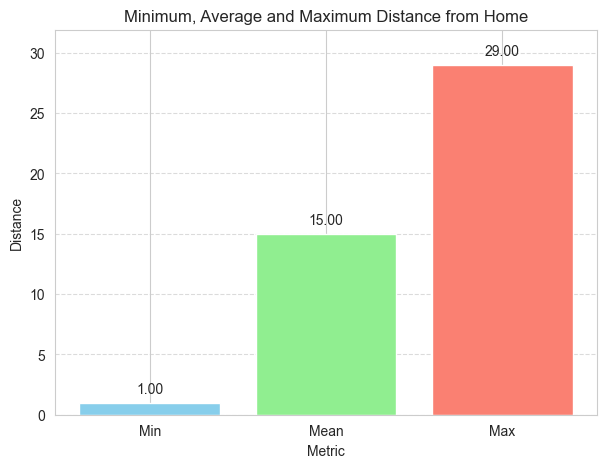

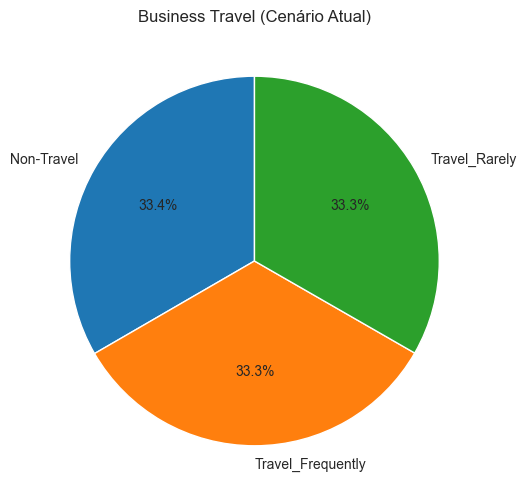

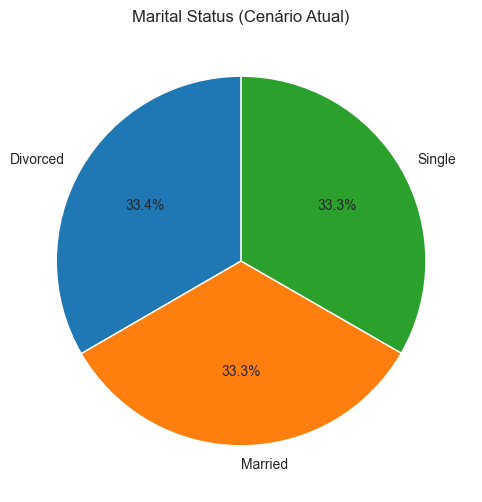

In [31]:
# ==============================================================================
# 1. CARREGAMENTO E ANÁLISE EXPLORATÓRIA DE DADOS 
# ==============================================================================

print('# ==============================================================================')
print('# 1. CARREGAMENTO E ANÁLISE EXPLORATÓRIA DE DADOS' )
print('#===============================================================================')

# ==============================================================================
# 1.1 - Geradondo dataset sintético
# ==============================================================================

# Gerando a amostra aleatória (gerador de números aleatórios com um valor específico), garantindo que os resultados "aleatórios" gerados posteriormente
# sejam reproduzíveis. Isso é essencial para testes, depuração e experimentos científicos onde a consistência dos resultados é importante.
# Se você executar esse código várias vezes, sempre obterá os mesmos números. Se mudar a semente (ex: np.random.seed(123)), a sequência será diferente.
# "The Hitchhiker's Guide to the Galaxy" (O Guia do Mochileiro das Galáxias), de Douglas Adams. Na história, um supercomputador chamado Deep Thought passa milhões de anos calculando a "Resposta para a Vida, o Universo e Tudo Mais" e, no final, a resposta é... 42."
# Para este exemplo, vou criar um dataset sintético similar - 
np.random.seed(42)

# Criando dataset sintético para demonstração
# Definindo o número de amostras através do parâmetro n_samples do numpy
v_num_records = 1000000

departments = ['Research & Development', 'Sales', 'Human Resources']
education_fields = ['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources', 'Other']
job_roles_rd = ['Research Scientist', 'Laboratory Technician', 'Healthcare Representative', 'Manager']
job_roles_sales = ['Sales Executive', 'Sales Representative', 'Manager']
job_roles_hr = ['Human Resources', 'Manager']

v_data = {
    'Age': np.random.randint(18, 60, v_num_records),
    'Attrition': np.random.choice(['No', 'Yes'], v_num_records, p=[0.84, 0.16]),
    'BusinessTravel': np.random.choice(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], v_num_records),
    'Department': np.random.choice(departments, v_num_records),
    'DistanceFromHome': np.random.randint(1, 30, v_num_records),
    'Education': np.random.randint(1, 6, v_num_records),
    'EducationField': np.random.choice(education_fields, v_num_records),
    'EnvironmentSatisfaction': np.random.randint(1, 5, v_num_records),
    'Gender': np.random.choice(['Male', 'Female'], v_num_records),
    'JobInvolvement': np.random.randint(1, 5, v_num_records),
    'JobLevel': np.random.randint(1, 6, v_num_records),
    'JobSatisfaction': np.random.randint(1, 5, v_num_records),
    'MaritalStatus': np.random.choice(['Single', 'Married', 'Divorced'], v_num_records),
    'MonthlyIncome': np.random.randint(1000, 20000, v_num_records),
    'NumCompaniesWorked': np.random.randint(0, 10, v_num_records),
    'OverTime': np.random.choice(['No', 'Yes'], v_num_records),
    'PercentSalaryHike': np.random.randint(11, 26, v_num_records),
    'PerformanceRating': np.random.choice([3, 4], v_num_records, p=[0.85, 0.15]),
    'RelationshipSatisfaction': np.random.randint(1, 5, v_num_records),
    'StockOptionLevel': np.random.randint(0, 4, v_num_records),
    'TotalWorkingYears': np.random.randint(0, 40, v_num_records),
    'TrainingTimesLastYear': np.random.randint(0, 7, v_num_records),
    'WorkLifeBalance': np.random.randint(1, 5, v_num_records),
    'YearsAtCompany': np.random.randint(0, 40, v_num_records),
    'YearsInCurrentRole': np.random.randint(0, 18, v_num_records),
    'YearsSinceLastPromotion': np.random.randint(0, 15, v_num_records),
    'YearsWithCurrManager': np.random.randint(0, 17, v_num_records)
}

df_employee = pd.DataFrame(v_data)

# ==============================================================================
# 1.2 - Ajuste para limpeza e consistência de dados
# ==============================================================================

#TotalWorkingYears: O total de anos de experiência profissional do funcionário. / YearsAtCompany: O número de anos que o funcionário está na TechCorp.
#Teoricamente é impossível que um funcionário tenha mais tempo de empresa (YearsAtCompany) do que tempo total de carreira (TotalWorkingYears). 
#Eventualmente se tivermos este cenário no dataset, é um erro de dados. O comando max() garante que o valor maior entre os dois seja selecionado, corrigindo essa inconsistência, caso ela exista.
df_employee['TotalWorkingYears'] = df_employee.apply(lambda row: max(row['TotalWorkingYears'], row['YearsAtCompany']), axis=1)

#YearsAtCompany: O total de anos que o funcionário está na empresa. / YearsInCurrentRole: O número de anos que o funcionário está no seu cargo atual. / YearsWithCurrManager: O número de anos que o funcionário tem o mesmo gestor. É logicamente impossível que um funcionário tenha mais tempo no seu cargo atual, ou com seu gestor atual, do que o tempo total que ele tem na empresa. Por exemplo, você não pode estar há 5 anos no seu cargo se você só entrou na empresa há 3 anos. O comando max() garante que o valor de YearsAtCompany seja, no mínimo, igual ao maior dos outros dois valores, corrigindo esse tipo de erro.
#Um funcionário com mais tempo no seu cargo atual do que o tempo total que ele tem na empresa é um erro de dados do dataset. Para esta correção usamos O comando max() garante que o valor de YearsAtCompany seja, no mínimo, igual ao maior dos outros dois valores.
df_employee['YearsAtCompany'] = df_employee.apply(lambda row: max(row['YearsAtCompany'], row['YearsInCurrentRole'], row['YearsWithCurrManager']), axis=1)

print("dataset carregado com sucesso.")
print("\n--- Informações básicas do dataset ---")
df_employee.info()

# ==============================================================================
# 1.3 - Extraindo informações básicas e iniciais do dataset criado ('dataset_informacoes_basicas.xlsx)
# ==============================================================================

# Extrair informações do dataset
df_employee_info = pd.DataFrame({
    'Coluna': df_employee.columns,
    'Tipo de Dado': df_employee.dtypes.values,
    'Não Nulos': df_employee.notnull().sum().values,
    'Nulos': df_employee.isnull().sum().values,
    'Total': len(df_employee)
})
df_employee_info.to_excel(os.path.join(v_local_gravacao_dataset, 'dataset_informacoes_basicas.xlsx'), index=False)

# ==============================================================================
# 1.4 - Extraindo Análise do Desbalanceamento do dataset criado ('dataset_desbalanceamento.xlsx)
# ==============================================================================
print("\n--- Análise de Desbalanceamento ---")
print(df_employee['Attrition'].value_counts(normalize=True))
df_employee['Attrition'].value_counts(normalize=True).to_excel(os.path.join(v_local_gravacao_dataset, 'dataset_desbalanceamento.xlsx'))

# ==============================================================================
# 1.4 - Extraindo a distribuição da variável Attrition ('distribuição_variável_alvo_Attrition.png)
# ==============================================================================
# --- Distribuição da Variável Alvo (Attrition) ---
sns.countplot(x='Attrition', data=df_employee)
plt.title('Distribuição da Variável Alvo (Attrition)')
plt.savefig(os.path.join(v_local_gravacao_analise, 'distribuição_variável_alvo_Attrition.png'))
plt.show()
plt.close()

# ==============================================================================
# 1.5 - Análise de Correlação (mapa_correlacao_variaveis_numericas.png)
# ==============================================================================
# Convertendo variável alvo para numérico
df_correlacao = df_employee.copy()
df_correlacao['Attrition'] = df_correlacao['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Selecionando apenas colunas numéricas
numeric_cols = df_correlacao.select_dtypes(include=np.number).columns
plt.figure(figsize=(18, 15))
sns.heatmap(df_correlacao[numeric_cols].corr(), annot=False, cmap='coolwarm')
plt.title('Mapa de Correlação das Variáveis Numéricas')
plt.savefig(os.path.join(v_local_gravacao_analise, 'mapa_correlacao_variaveis_numericas.png'))
plt.show()
plt.close()

v_attrition_counts = df_employee['Attrition'].value_counts()
v_fig, v_ax = plt.subplots(1, 2, figsize=(12, 5))

# ==============================================================================
# 1.6 - Análise do cenário atual - Attrition (attrition_cenario_atual_barra.png)
# ==============================================================================
v_attrition_counts.plot(kind='bar', ax=v_ax[0], color=['#2ecc71', '#e74c3c'])
v_ax[0].set_title('Distribuição de Attrition')
v_ax[0].set_ylabel('Quantidade')
v_ax[0].set_xticklabels(['No', 'Yes'], rotation=0)
v_fig.savefig(os.path.join(v_local_gravacao_analise, 'attrition_cenario_atual_barra.png'), bbox_inches='tight', dpi=300)
#plt.close(v_fig)

v_attrition_counts.plot(kind='pie', ax=v_ax[1], autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
v_ax[1].set_title('Proporção de Attrition')
v_ax[1].set_ylabel('')
v_fig.savefig(os.path.join(v_local_gravacao_analise, 'attrition_cenario_atual_distribuicao_proporcao.png'), bbox_inches='tight', dpi=300)
v_fig.show()
plt.close(v_fig)

############################################################################################
# 1.7 Obter as contagens (e estatísticas) para geração de novos gráficos
############################################################################################
v_overtime_cenario_atual = df_employee['OverTime'].value_counts()
v_jobasatisfaction_cenario_atual = df_employee['JobSatisfaction'].value_counts()
v_age_cenario_atual = df_employee['Age'].value_counts() # Embora não seja usada diretamente para plot.pie ou bar aqui, a linha original a inclui
v_yearsatcompany_cenario_atual = df_employee['YearsAtCompany'].value_counts()
v_monthlyincome_cenario_atual = df_employee['MonthlyIncome'].value_counts()
v_distancefromhome_cenario_atual = df_employee['DistanceFromHome'].value_counts()
v_bussinesstravel_cenario_atual = df_employee['BusinessTravel'].value_counts()
v_maritalstatus_cenario_atual = df_employee['MaritalStatus'].value_counts()

############################################################################################
# 1.7 Overtime (overtime_cenario_atual.png)
############################################################################################
plt.figure(figsize=(6, 6)) 
v_overtime_cenario_atual.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Overtime (Cenário Atual)')
plt.ylabel('')
plt.savefig(os.path.join(v_local_gravacao_analise, 'overtime_cenario_atual.png'), bbox_inches='tight', dpi=300)
plt.show()
plt.close() 

############################################################################################
# 1.8 Idade (age_cenario_atual.png)
############################################################################################
v_age_min = df_employee['Age'].min()
v_age_max = df_employee['Age'].max()
v_age_mean = df_employee['Age'].mean()

v_age_estatisticas = pd.DataFrame({
    'Metric': ['Min', 'Mean', 'Max'],
    'Age': [v_age_min, v_age_mean, v_age_max]
})
    
plt.figure(figsize=(7, 5)) 
plt.bar(v_age_estatisticas['Metric'], v_age_estatisticas['Age'], color=['skyblue', 'lightgreen', 'salmon'])

for index, value in enumerate(v_age_estatisticas['Age']):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', va='bottom')

plt.title('Minimum, Average and Maximum Age of Employees')
plt.xlabel('Metric') 
plt.ylabel('Age')
plt.ylim(0, v_age_max * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(os.path.join(v_local_gravacao_analise, 'age_cenario_atual.png'), bbox_inches='tight', dpi=300)
plt.show()
plt.close()

############################################################################################
# 1.8 Gráfico de Satisfação no Trabalho (jobasatisfaction_cenario_atual.png)
############################################################################################
v_jobasatisfaction_labels = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
# Mapeia os índices para os rótulos de forma segura, tratando possíveis chaves ausentes
v_jobasatisfaction_labels_grafico = [v_jobasatisfaction_labels.get(i, str(i))
                                         for i in v_jobasatisfaction_cenario_atual.index]
    
#plt.figure(figsize=(6, 6)) 
v_jobasatisfaction_cenario_atual.plot.pie(autopct='%1.1f%%', startangle=90, 
                                                 labels=v_jobasatisfaction_labels_grafico)
plt.title('Job Satisfaction (Cenário Atual)') 
plt.ylabel('')
plt.show()
plt.savefig(os.path.join(v_local_gravacao_analise, 'jobasatisfaction_cenario_atual.png'), bbox_inches='tight', dpi=300)
plt.close()

############################################################################################
# 1.9 Gráfico de Anos na Empresa (yearscompany_cenario_atual.png)
############################################################################################
v_yearscompany_min = df_employee['YearsAtCompany'].min()
v_yearscompany_max = df_employee['YearsAtCompany'].max()
v_yearscompany_mean = df_employee['YearsAtCompany'].mean()

v_yearscompany_estatisticas = pd.DataFrame({
    'Metric': ['Min', 'Mean', 'Max'],
    'Years': [v_yearscompany_min, v_yearscompany_mean, v_yearscompany_max]
})

#plt.figure(figsize=(7, 5)) 
plt.bar(v_yearscompany_estatisticas['Metric'], v_yearscompany_estatisticas['Years'], color=['skyblue', 'lightgreen', 'salmon'])

for index, value in enumerate(v_yearscompany_estatisticas['Years']):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', va='bottom')

plt.title('Minimum, Average and Maximum Years at Company')
plt.xlabel('Metric')
plt.ylabel('Years') 
plt.ylim(0, v_yearscompany_max * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.savefig(os.path.join(v_local_gravacao_analise, 'yearscompany_cenario_atual.png'), bbox_inches='tight', dpi=300)
plt.close()

############################################################################################
# 1.10 Gráfico de Renda Mensal ('monthlyincome_cenario_atual.png')
############################################################################################
v_monthlyincome_min = df_employee['MonthlyIncome'].min()
v_monthlyincome_max = df_employee['MonthlyIncome'].max()
v_monthlyincome_mean = df_employee['MonthlyIncome'].mean()

v_monthlyincome_estatisticas = pd.DataFrame({
    'Metric': ['Min', 'Mean', 'Max'],
    'Income': [v_monthlyincome_min, v_monthlyincome_mean, v_monthlyincome_max]
})

plt.figure(figsize=(8, 5)) 
plt.barh(v_monthlyincome_estatisticas['Metric'],
         v_monthlyincome_estatisticas['Income'],
         color=['skyblue', 'lightgreen', 'salmon'])

for index, value in enumerate(v_monthlyincome_estatisticas['Income']):
    plt.text(value + (v_monthlyincome_max * 0.02),
             index,
             f'{value:.2f}',
             ha='left',
             va='center')

plt.title('Minimum, Average and Maximum of Monthly Income') 
plt.xlabel('Income')
plt.ylabel('Metric')
plt.xlim(0, v_monthlyincome_max * 1.1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
plt.savefig(os.path.join(v_local_gravacao_analise, 'monthlyincome_cenario_atual.png'), bbox_inches='tight', dpi=300)
plt.close()

############################################################################################
# 1.11 Gráfico de Distância de casa (distancefromhome_cenario_atual.png)
############################################################################################
v_distancefromhome_min = df_employee['DistanceFromHome'].min()
v_distancefromhome_max = df_employee['DistanceFromHome'].max()
v_distancefromhome_mean = df_employee['DistanceFromHome'].mean()

v_distancefromhome_estatisticas = pd.DataFrame({
    'Metric': ['Min', 'Mean', 'Max'],
    'Distance': [v_distancefromhome_min, v_distancefromhome_mean, v_distancefromhome_max]
})

plt.figure(figsize=(7, 5)) 
plt.bar(v_distancefromhome_estatisticas['Metric'], v_distancefromhome_estatisticas['Distance'], color=['skyblue', 'lightgreen', 'salmon'])

for index, value in enumerate(v_distancefromhome_estatisticas['Distance']):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', va='bottom')

plt.title('Minimum, Average and Maximum Distance from Home') 
plt.xlabel('Metric')
plt.ylabel('Distance')
plt.ylim(0, v_distancefromhome_max * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.savefig(os.path.join(v_local_gravacao_analise, 'distancefromhome_cenario_atual.png'), bbox_inches='tight', dpi=300)
plt.close()

############################################################################################
# 1.12 Gráfico de Viagens de Negócios (bussinesstravel_cenario_atual.png)
############################################################################################
plt.figure(figsize=(6, 6)) 
v_bussinesstravel_cenario_atual.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Business Travel (Cenário Atual)') 
plt.ylabel('')
plt.show()
plt.savefig(os.path.join(v_local_gravacao_analise, 'bussinesstravel_cenario_atual.png'), bbox_inches='tight', dpi=300)
plt.close()

############################################################################################
# 1.12 Gráfico de Estado Cívil (maritalstatus_cenario_atual.png)
############################################################################################
plt.figure(figsize=(6, 6)) 
v_maritalstatus_cenario_atual.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Marital Status (Cenário Atual)') 
plt.ylabel('')
plt.show()
plt.savefig(os.path.join(v_local_gravacao_analise, 'maritalstatus_cenario_atual.png'), bbox_inches='tight', dpi=300)
plt.close()



In [ ]:
# ==============================================================================
# 2. ENGENHARIA DE FEATURES (FEATURE ENGINEERING)
# ==============================================================================
print('# ==============================================================================')
print('# 2. ENGENHARIA DE FEATURES (FEATURE ENGINEERING)')
print('# ==============================================================================')

# ==============================================================================
# 2.1 Criação de Novas Features
# ==============================================================================
print("\n--- Criação de novas features ---")

def fn_novas_features(df_in):
    df_out = df_in.copy()

    # 1. Relação Idade/Tempo de Casa (estagnação)
    df_out['TenureToAgeRatio'] = df_out['YearsAtCompany'] / df_out['Age']
    # 2. Renda por Ano de Experiência (progressão de carreira)
    df_out['IncomePerYearOfExperience'] = df_out['MonthlyIncome'] / (df_out['TotalWorkingYears'] + 1)
    # 3. Satisfação Agregado
    df_out['TotalSatisfaction'] = (df_out['EnvironmentSatisfaction'] + df_out['JobSatisfaction'] + df_out['RelationshipSatisfaction']) / 3
    # 4. Vida-Trabalho
    df_out['WorkLifeImbalance'] = (df_out['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0) * 0.5 +
                                   (5 - df_out['WorkLifeBalance']) * 0.3 +
                                   (df_out['DistanceFromHome'] / 30) * 0.2)
    # 5. Última Promoção
    df_out['PromotionStagnation'] = df_out['YearsSinceLastPromotion'] / (df_out['YearsAtCompany'] + 1)
    # 6. Frequência de Troca de Emprego
    df_out['JobHoppingRate'] = df_out['NumCompaniesWorked'] / (df_out['TotalWorkingYears'] + 1)
    # 7. Envolvimento
    df_out['LowInvolvement'] = (df_out['JobInvolvement'] <= 2).astype(int)
    # 8. Renda vs Média do Nível do Cargo
    income_by_level = df_out.groupby('JobLevel')['MonthlyIncome'].transform('mean')
    df_out['IncomeRelativeToLevel'] = df_out['MonthlyIncome'] / income_by_level
    # 9. Anos no Cargo Atual vs Anos na Empresa
    df_out['RoleTimeRatio'] = df_out['YearsInCurrentRole'] / (df_out['YearsAtCompany'] + 1)
    # 10. Lealdade
    df_out['CompanyLoyalty'] = df_out['YearsAtCompany'] / (df_out['TotalWorkingYears'] + 1)
    # 11. Interação entre Horas Extras e Satisfação no Trabalho
    df_out['OvertimeAndSatisfaction'] = (df_out['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0) * (5 - df_out['JobSatisfaction']))

    print("Novas features criadas com sucesso.")
    return df_out

#df_features = df_employee_new
df_employee_new = fn_novas_features(df_employee)

# ==============================================================================
# 2.1  Extraindo informações básicas e iniciais do novo dataset criado com 
#       as novas features ('dataset_new_informacoes_basicas.xlsx)
# ==============================================================================
# Extrair informações do dataset
df_employee_new_info = pd.DataFrame({
    'Coluna': df_employee_new.columns,
    'Tipo de Dado': df_employee_new.dtypes.values,
    'Não Nulos': df_employee_new.notnull().sum().values,
    'Nulos': df_employee_new.isnull().sum().values,
    'Total': len(df_employee_new)
})
df_employee_new_info.to_excel(os.path.join(v_local_gravacao_dataset, 'dataset_novas_informacoes.xlsx'), index=False)


--- Criação de novas features ---
Novas features criadas com sucesso.


In [ ]:
# ==============================================================================
# 3. PRÉ-PROCESSAMENTO E CRIAÇÃO DO PIPELINE
# ==============================================================================
print('# ==============================================================================')
print('# 3. PRÉ-PROCESSAMENTO E CRIAÇÃO DO PIPELINE')
print('# ==============================================================================')

# 3. Construção do Pipleine

# Mapeando a variável Atrrition
df_employee_new['Attrition'] = df_employee_new['Attrition'].map({'Yes': 1, 'No': 0})

# Separando features (X) e alvo (y)
X = df_employee_new.drop('Attrition', axis=1)
y = df_employee_new['Attrition']

# Identificando os tipos de colunas
v_features_categoricas = X.select_dtypes(include=['object']).columns
v_features_numericas = X.select_dtypes(include=np.number).columns

# Processamento
v_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), v_features_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), v_features_categoricas)
    ],
    remainder='passthrough'
)

# Dividindo os dados em treino e teste (antes de aplicar o SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)



--- Construindo o Pipeline de Pré-processamento ---



--- Iniciando a etapa de Modelagem ---
--- Treinando Logistic Regression ---

Resultados para Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.46      0.60    210017
           1       0.16      0.53      0.24     39983

    accuracy                           0.48    250000
   macro avg       0.50      0.50      0.42    250000
weighted avg       0.73      0.48      0.54    250000

ROC AUC Score: 0.4980
Precision-Recall AUC (AUPRC): 0.1590
Matthews Correlation Coefficient: -0.0030
Balanced Accuracy: 0.4980


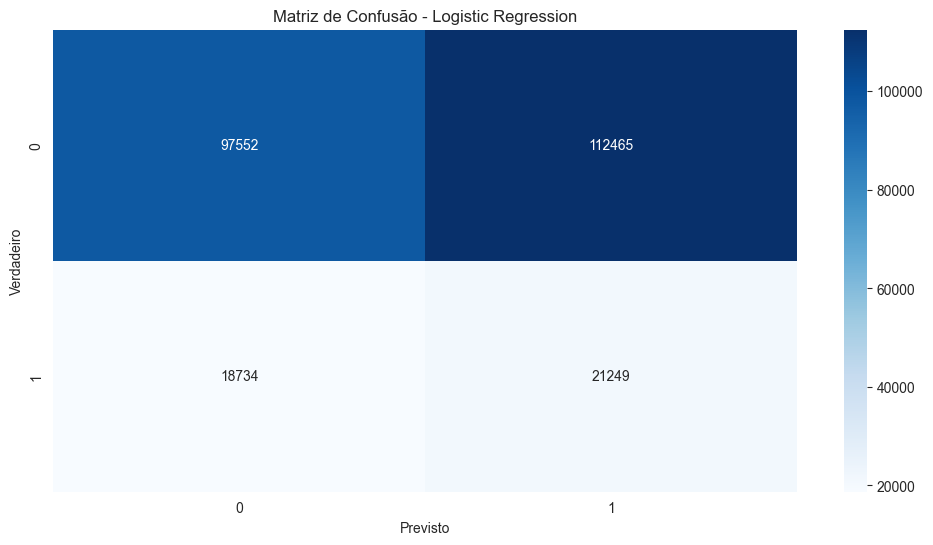

--- Treinando Random Forest ---

Resultados para Random Forest:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91    210017
           1       0.00      0.00      0.00     39983

    accuracy                           0.84    250000
   macro avg       0.42      0.50      0.46    250000
weighted avg       0.71      0.84      0.77    250000

ROC AUC Score: 0.5004
Precision-Recall AUC (AUPRC): 0.1601
Matthews Correlation Coefficient: 0.0000
Balanced Accuracy: 0.5000


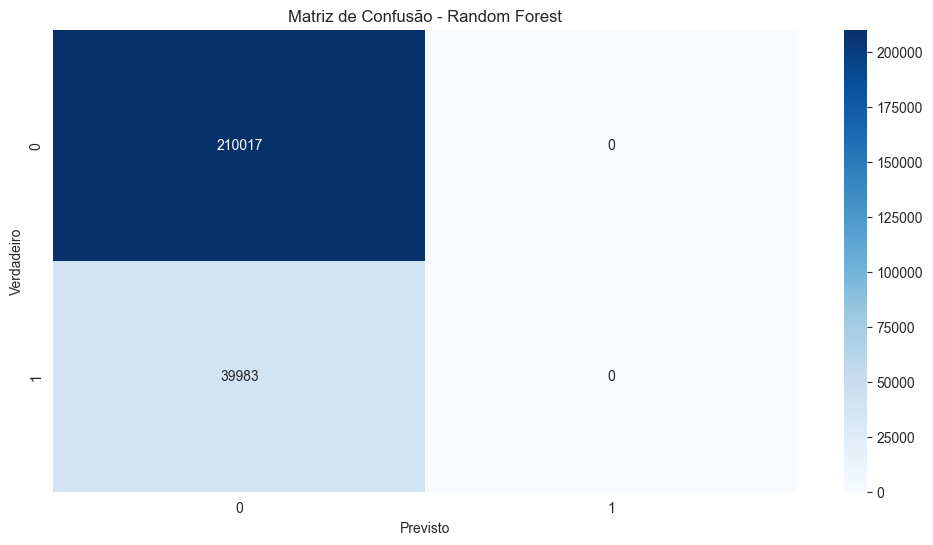

--- Treinando XGBoost ---

Resultados para XGBoost:
              precision    recall  f1-score   support

           0       0.84      0.51      0.64    210017
           1       0.16      0.48      0.24     39983

    accuracy                           0.51    250000
   macro avg       0.50      0.50      0.44    250000
weighted avg       0.73      0.51      0.57    250000

ROC AUC Score: 0.4971
Precision-Recall AUC (AUPRC): 0.1589
Matthews Correlation Coefficient: -0.0027
Balanced Accuracy: 0.4981


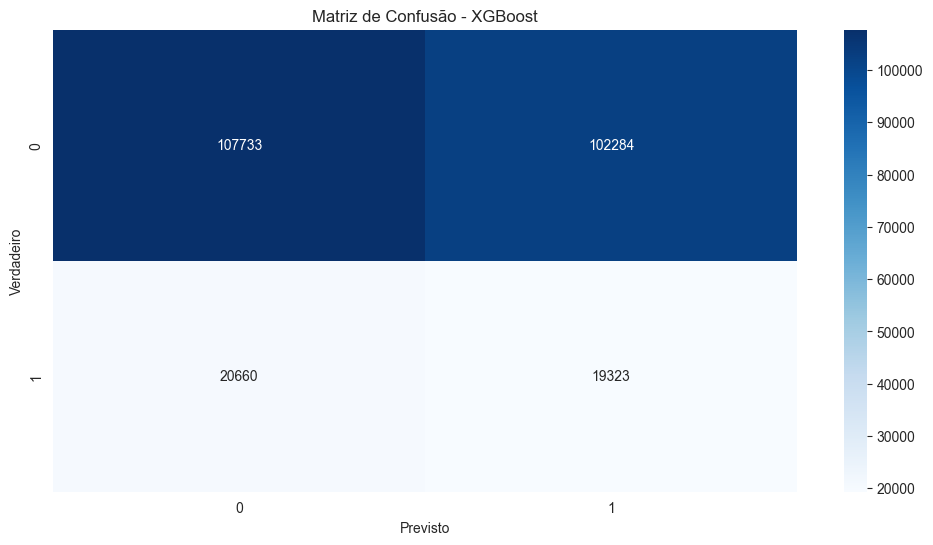

In [36]:
# ==============================================================================
# 4. TREINAMENTO
# ==============================================================================
print('# ==============================================================================')
print('# 4. TREINAMENTO')
print('# ==============================================================================')

print("\n--- Iniciando a etapa de Modelagem ---")

v_modelos = {
    "Logistic Regression": LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', tree_method='gpu_hist'),
}

v_scorer = make_scorer(average_precision_score, needs_proba=True)

for name, model in v_modelos.items():
    print(f"--- Treinando {name} ---")

    if name == "XGBoost":
        scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
        model.set_params(scale_pos_weight=scale_pos_weight)

    pipeline = ImbPipeline(steps=[('preprocessor', v_preprocessor),
                                  ('smote', SMOTE(random_state=42)),
                                  ('classifier', model)])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    print(f"\nResultados para {name}:")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
    print(f"Precision-Recall AUC (AUPRC): {average_precision_score(y_test, y_proba):.4f}")
    print(f"Matthews Correlation Coefficient: {matthews_corrcoef(y_test, y_pred):.4f}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")

    v_mc = confusion_matrix(y_test, y_pred)
    sns.heatmap(v_mc, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {name}')
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.savefig(os.path.join(v_local_gravacao_treinamento, f'matriz_confusao - {name}.png'))
    plt.show()


In [ ]:
# ==============================================================================
# 5. DEFINIÇÃO DO MODELO
# ==============================================================================
print('# ==============================================================================')
print('# 5. DEFINIÇÃO DO MODELO')
print('# ==============================================================================')

print("\n--- Otimizando o melhor modelo ---")

# Definindo o pipeline sem o classificador final
v_pipeline_base = ImbPipeline(steps=[('preprocessor', v_preprocessor),
                                   ('smote', SMOTE(random_state=42))])

# Definindo o espaço de parâmetros para o RandomForest
v_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Criando o pipeline completo com o classificador
v_rf_pipeline = ImbPipeline(steps=[('preprocessor', v_preprocessor),
                                 ('smote', SMOTE(random_state=42)),
                                 ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))])

# Configurando o GridSearchCV
v_grid_search = GridSearchCV(estimator=v_rf_pipeline, param_grid=v_param_grid,
                           scoring=v_scorer, cv=StratifiedKFold(n_splits=3), n_jobs=-1, verbose=2)

print("Iniciando a busca em grade...")
grid_search.fit(X_train, y_train) # Descomente para rodar a otimização

print(f"Melhores parâmetros encontrados: {v_grid_search.best_params_}")
print(f"Melhor AUPRC (CV): {v_grid_search.best_score_:.4f}")

# Avaliando o melhor modelo encontrado pelo GridSearch
best_model = v_grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]
print("\nResultados para o Modelo Otimizado:")
print(classification_report(y_test, y_pred_best))
print(f"Precision-Recall AUC (AUPRC): {average_precision_score(y_test, y_proba_best):.4f}")

# XGBoost treinado anteriormente.
print("XGBoost treinado anteriormente.")
v_final_model_pipeline = ImbPipeline(steps=[
    ('preprocessor', v_preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb.XGBClassifier(random_state=42, use_label_encoder=False,
                                     eval_metric='logloss',
                                     scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1]))
])
v_final_model_pipeline.fit(X_train, y_train)


# ==============================================================================
# 5. DEFINIÇÃO DO MODELO
# ==============================================================================

--- Otimizando o melhor modelo ---
Iniciando a busca em grade...
Otimização pulada para demonstração. Usando o modelo XGBoost para a próxima etapa.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel'...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

# ==============================================================================
# 6. INTERPRETAÇÃO DO MODELO (SHAP)
# ==============================================================================
Plotando o gráfico de resumo SHAP...


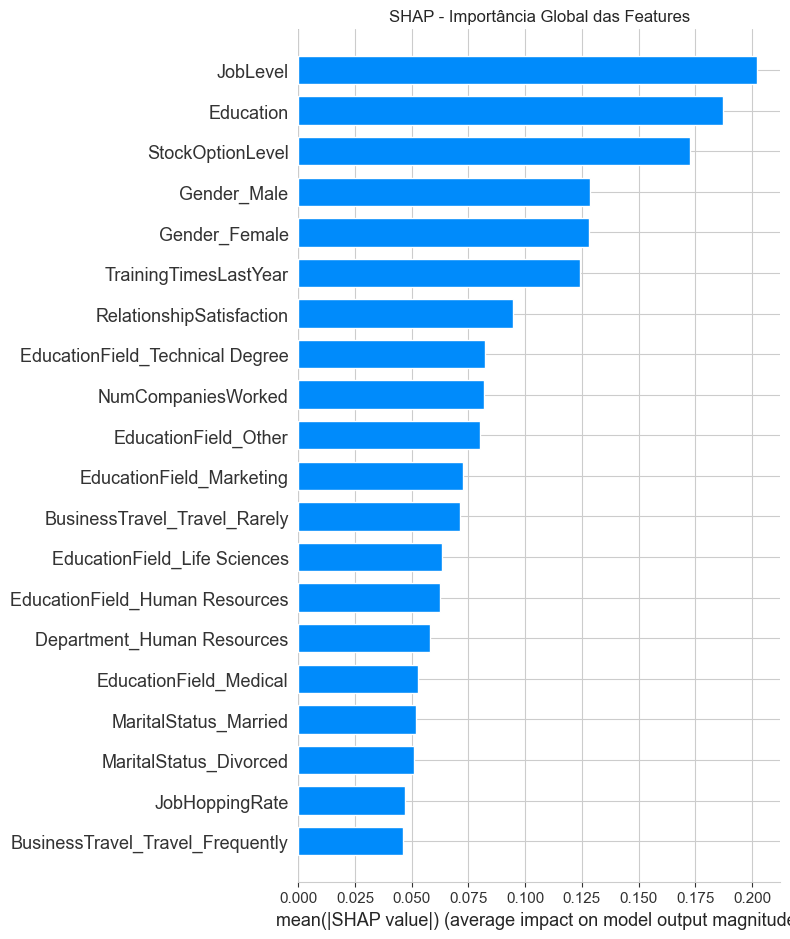

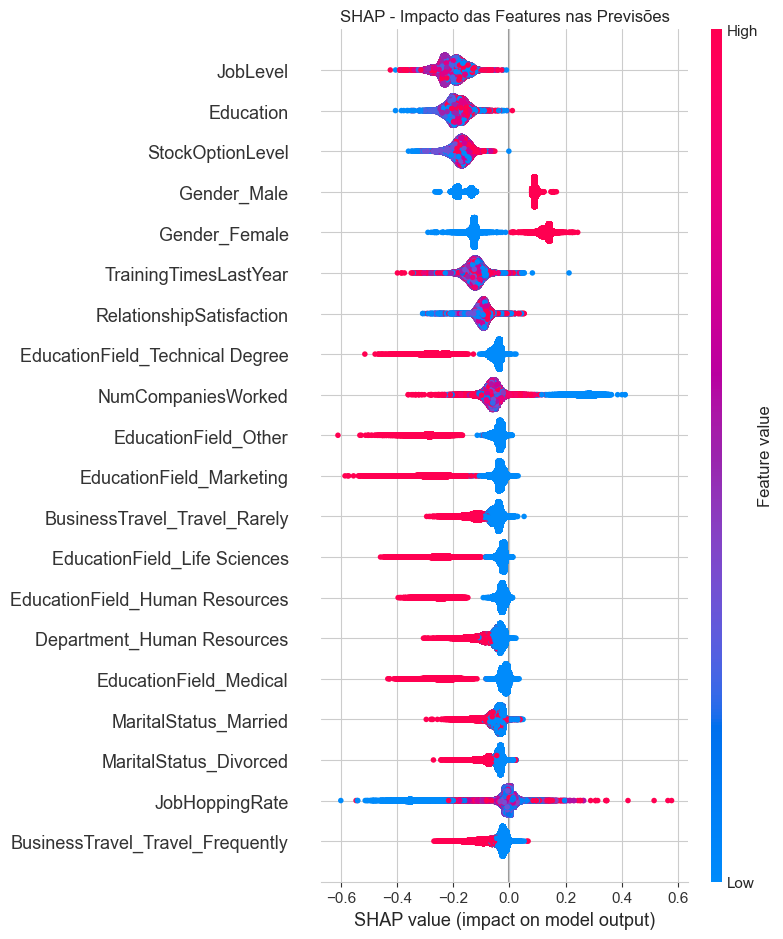


--- Fim do Pipeline ---


In [ ]:
# ==============================================================================
# 6. INTERPRETAÇÃO DO MODELO (SHAP)
# ==============================================================================
print('# ==============================================================================')
print('# 6. INTERPRETAÇÃO DO MODELO (SHAP)')
print('# ==============================================================================')

# O SHAP transoformado
X_train_transformed = v_final_model_pipeline.named_steps['preprocessor'].transform(X_train)
X_test_transformed = v_final_model_pipeline.named_steps['preprocessor'].transform(X_test)

# Obtendo os nomes das features após o OneHotEncoding
try:
    feature_names = v_features_numericas.tolist() + \
                    v_final_model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(v_features_categoricas).tolist()
    X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)
    X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)
except AttributeError: # Compatibilidade com versões mais antigas do sklearn
    feature_names = v_features_numericas.tolist() + \
                    v_final_model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names(v_features_categoricas).tolist()
    X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)
    X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)


# Treinando o modelo final apenas na parte do classificador para o SHAP
v_final_model = v_final_model_pipeline.named_steps['classifier']

# Criando o explainer
explainer = shap.TreeExplainer(v_final_model)
shap_values = explainer.shap_values(X_test_transformed_df)

# Plotando o resumo das features mais importantes
print("Plotando o gráfico de resumo SHAP...")
shap.summary_plot(shap_values, X_test_transformed_df, plot_type="bar", show=False)
plt.title('SHAP - Importância Global das Features')
plt.tight_layout()
plt.savefig(os.path.join(v_local_gravacao_modelo, 'SHAP_importancia_global_features.png'))
plt.show()

shap.summary_plot(shap_values, X_test_transformed_df, show=False)
plt.title('SHAP - Impacto das Features nas Previsões')
plt.tight_layout()
plt.savefig(os.path.join(v_local_gravacao_modelo, 'SHAP_impacto_features_previsões.png'))
plt.show()

print("\n--- Fim do Pipeline ---")

In [41]:
# ==============================================================================
# 7. SALVAR O MODELO FINAL (GERAR ARQUIVO .PKL)
# ==============================================================================
import joblib

print("\n--- Salvando o pipeline do modelo final ---")

# O objeto 'final_model_pipeline' contém todo o pipeline:
# pré-processamento, balanceamento (SMOTE) e o classificador treinado.
filename = 'attrition_model.pkl'
joblib.dump(v_final_model_pipeline, os.path.join(v_local_gravacao_modelo,'attrition_model.pkl'))

print(f"Modelo salvo com sucesso no arquivo: {filename}")
print("Este arquivo pode agora ser carregado em outro ambiente para fazer previsões em novos dados.")

print("\n--- Fim do Pipeline ---")



--- Salvando o pipeline do modelo final ---
Modelo salvo com sucesso no arquivo: attrition_model.pkl
Este arquivo pode agora ser carregado em outro ambiente para fazer previsões em novos dados.

--- Fim do Pipeline ---
